# epochs --> pandas df

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import mne

sample_data_folder = mne.datasets.sample.data_path()
sample_data_raw_file = (sample_data_folder / 'MEG' / 'sample' /
                        'sample_audvis_filt-0-40_raw.fif')
raw = mne.io.read_raw_fif(sample_data_raw_file, verbose=False)

In [2]:
sample_data_events_file = (sample_data_folder / 'MEG' / 'sample' /
                           'sample_audvis_filt-0-40_raw-eve.fif')
events = mne.read_events(sample_data_events_file)

event_dict = {'auditory/left': 1, 'auditory/right': 2, 'visual/left': 3,
              'visual/right': 4}

reject_criteria = dict(mag=3000e-15,     # 3000 fT
                       grad=3000e-13,    # 3000 fT/cm
                       eeg=100e-6,       # 100 µV
                       eog=200e-6)       # 200 µV

tmin, tmax = (-0.2, 0.5)  # epoch from 200 ms before event to 500 ms after it
baseline = (None, 0)      # baseline period from start of epoch to time=0

epochs = mne.Epochs(raw, events, event_dict, tmin, tmax, proj=True,
                    baseline=baseline, reject=reject_criteria, preload=True)
del raw

Not setting metadata
288 matching events found
Setting baseline interval to [-0.19979521315838786, 0.0] sec
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 4)
4 projection items activated
Loading data for 288 events and 106 original time points ...
    Rejecting  epoch based on EEG : ['EEG 003']
    Rejecting  epoch based on EEG : ['EEG 001', 'EEG 002', 'EEG 003', 'EEG 004', 'EEG 006', 'EEG 007']
    Rejecting  epoch based on EEG : ['EEG 001', 'EEG 002', 'EEG 003', 'EEG 007']
    Rejecting  epoch based on EEG : ['EEG 001']
    Rejecting  epoch based on EEG : ['EEG 003', 'EEG 007']
    Rejecting  epoch based on EEG : ['EEG 007']
    Rejecting  epoch based on EEG : ['EEG 003', 'EEG 007']
    Rejecting  epoch based on EEG : ['EEG 007']
    Rejecting  epoch based on MAG : ['MEG 1411', 'MEG 1421', 'MEG 1441']
    Rejecting  epoch based on MAG : ['MEG 1711']
    Rejecting  epoch based on EEG : ['EEG 001', 'EEG 002', 'EEG 003', 'EEG 007']
    Rejecting 

In [3]:
df = epochs.to_data_frame()
df.iloc[:5, :10]

,time,condition,epoch,MEG 0113,MEG 0112,MEG 0111,MEG 0122,MEG 0123,MEG 0121,MEG 0132
0,-0.199795,visual/left,1,21.320252,11.567619,-73.248584,-10.609895,-18.700540,-68.352746,-17.908667
1,-0.193135,visual/left,1,7.049675,-9.702938,-34.168267,17.480975,-40.182237,-121.225684,2.072452
2,-0.186476,visual/left,1,5.283711,-13.006895,-26.912317,52.130290,-65.157198,-117.842466,6.986073
3,-0.179816,visual/left,1,23.040471,1.643716,-37.835772,48.517952,-65.214631,-82.043144,9.672744
4,-0.173156,visual/left,1,25.688943,7.974112,-85.561683,6.450115,-43.778315,-111.795987,17.277138


In [4]:
df = epochs.to_data_frame(time_format=None,
                          scalings=dict(eeg=1, mag=1, grad=1))
df.iloc[:5, :10]

,time,condition,epoch,MEG 0113,MEG 0112,MEG 0111,MEG 0122,MEG 0123,MEG 0121,MEG 0132
0,-0.199795,visual/left,1,2.132025e-12,1.156762e-12,-7.324858e-14,-1.060990e-12,-1.870054e-12,-6.835275e-14,-1.790867e-12
1,-0.193135,visual/left,1,7.049675e-13,-9.702938e-13,-3.416827e-14,1.748098e-12,-4.018224e-12,-1.212257e-13,2.072452e-13
2,-0.186476,visual/left,1,5.283711e-13,-1.300690e-12,-2.691232e-14,5.213029e-12,-6.515720e-12,-1.178425e-13,6.986073e-13
3,-0.179816,visual/left,1,2.304047e-12,1.643716e-13,-3.783577e-14,4.851795e-12,-6.521463e-12,-8.204314e-14,9.672744e-13
4,-0.173156,visual/left,1,2.568894e-12,7.974112e-13,-8.556168e-14,6.450115e-13,-4.377831e-12,-1.117960e-13,1.727714e-12


In [5]:
df = epochs.to_data_frame(index=['condition', 'epoch'],
                          time_format='timedelta')
df.iloc[:5, :10]

time   MEG 0113   MEG 0112  \
condition   epoch                                                     
visual/left 1     -1 days +23:59:59.800204787  21.320252  11.567619   
            1     -1 days +23:59:59.806864627   7.049675  -9.702938   
            1     -1 days +23:59:59.813524468   5.283711 -13.006895   
            1     -1 days +23:59:59.820184308  23.040471   1.643716   
            1     -1 days +23:59:59.826844149  25.688943   7.974112   

                    MEG 0111   MEG 0122   MEG 0123    MEG 0121   MEG 0132  \
condition   epoch                                                           
visual/left 1     -73.248584 -10.609895 -18.700540  -68.352746 -17.908667   
            1     -34.168267  17.480975 -40.182237 -121.225684   2.072452   
            1     -26.912317  52.130290 -65.157198 -117.842466   6.986073   
            1     -37.835772  48.517952 -65.214631  -82.043144   9.672744   
            1     -85.561683   6.450115 -43.778315 -111.795987  17.277138   

                    MEG 0133    MEG 0131  
condition   epoch                         
visual/left 1      45.379736  -53.123525  
            1      27.734826  -95.339465  
            1       5.996158 -177.627037  
            1       1.748030 -211.024973  
            1       2.123811 -173.917677

In [6]:
long_df = epochs.to_data_frame(time_format=None, index='condition',
                               long_format=True)
long_df.head()

Converting "epoch" to "category"...
Converting "channel" to "category"...
Converting "ch_type" to "category"...


,epoch,time,channel,ch_type,value
condition,,,,,
visual/left,1,-0.199795,MEG 0113,grad,21.320252
visual/left,1,-0.199795,MEG 0112,grad,11.567619
visual/left,1,-0.199795,MEG 0111,mag,-73.248584
visual/left,1,-0.199795,MEG 0122,grad,-10.609895
visual/left,1,-0.199795,MEG 0123,grad,-18.700540


<AxesSubplot:xlabel='time', ylabel='value'>

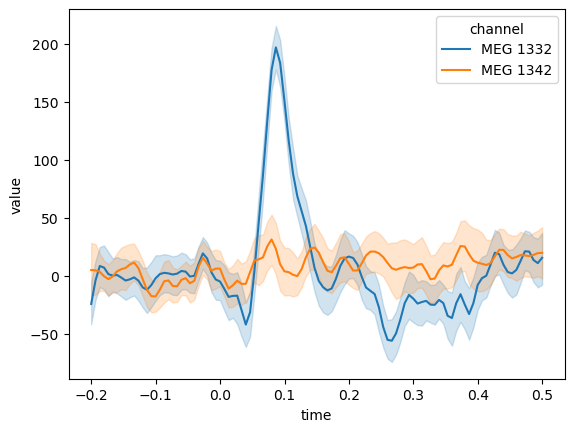

In [7]:
plt.figure()
channels = ['MEG 1332', 'MEG 1342']
data = long_df.loc['auditory/left'].query('channel in @channels')
# convert channel column (CategoryDtype → string; for a nicer-looking legend)
data['channel'] = data['channel'].astype(str)
data.reset_index(drop=True, inplace=True)  # speeds things up
sns.lineplot(x='time', y='value', hue='channel', data=data)

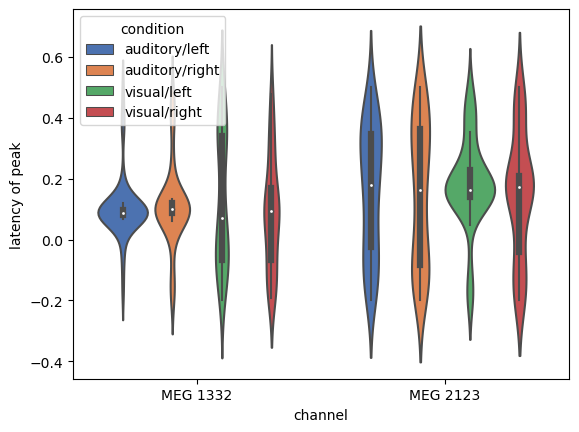

In [8]:
plt.figure()
df = epochs.to_data_frame(time_format=None)
peak_latency = (df.filter(regex=r'condition|epoch|MEG 1332|MEG 2123')
                .groupby(['condition', 'epoch'])
                .aggregate(lambda x: df['time'].iloc[x.idxmax()])
                .reset_index()
                .melt(id_vars=['condition', 'epoch'],
                      var_name='channel',
                      value_name='latency of peak')
                )

ax = sns.violinplot(x='channel', y='latency of peak', hue='condition',
                    data=peak_latency, palette='deep', saturation=1)

# continous data --> equally spaced epochs

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import mne
from mne.preprocessing import compute_proj_ecg
from mne_connectivity import envelope_correlation

sample_data_folder = mne.datasets.sample.data_path()
sample_data_raw_file = (sample_data_folder / 'MEG' / 'sample' /
                        'sample_audvis_raw.fif')
raw = mne.io.read_raw_fif(sample_data_raw_file)

Opening raw data file /Users/DanDan/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.


In [11]:
raw.crop(tmax=150).resample(100).pick('meg')
ecg_proj, _ = compute_proj_ecg(raw, ch_name='MEG 0511')  # No ECG chan
raw.add_proj(ecg_proj)
raw.apply_proj()

221 events found
Event IDs: [ 1  2  3  4  5 32]
221 events found
Event IDs: [ 1  2  3  4  5 32]
Including 3 SSP projectors from raw file
Running ECG SSP computation
Using channel MEG 0511 to identify heart beats.
Setting up band-pass filter from 5 - 35 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 5.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 4.75 Hz)
- Upper passband edge: 35.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 35.25 Hz)
- Filter length: 1000 samples (10.000 sec)

Number of ECG events detected : 165 (average pulse 66 / min.)
Computing projector
Filtering a subset of channels. The highpass and lowpass values in the measurement info will not be updated.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 35 Hz

FIR filter parameters


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Not setting metadata
165 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 3)
3 projection items activated
Using data from preloaded Raw for 165 events and 61 original time points ...


[Parallel(n_jobs=1)]: Done 305 out of 305 | elapsed:    0.4s finished


    Rejecting  epoch based on MAG : ['MEG 1711']
    Rejecting  epoch based on MAG : ['MEG 1711']
    Rejecting  epoch based on MAG : ['MEG 1411', 'MEG 1421']
3 bad epochs dropped
No EEG channels found. Forcing n_eeg to 0
Adding projection: planar--0.200-0.400-PCA-01
Adding projection: planar--0.200-0.400-PCA-02
Adding projection: axial--0.200-0.400-PCA-01
Adding projection: axial--0.200-0.400-PCA-02
Done.
7 projection items deactivated
Created an SSP operator (subspace dimension = 7)
7 projection items activated
SSP projectors applied...


<Raw | sample_audvis_raw.fif, 306 x 15000 (150.0 s), ~38.2 MB, data loaded>

In [12]:
epochs = mne.make_fixed_length_epochs(raw, duration=30, preload=False)

Not setting metadata
5 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 7)
7 projection items activated


Using data from preloaded Raw for 5 events and 3000 original time points ...
0 bad epochs dropped
Not setting metadata
5 matching events found
No baseline correction applied
0 projection items activated


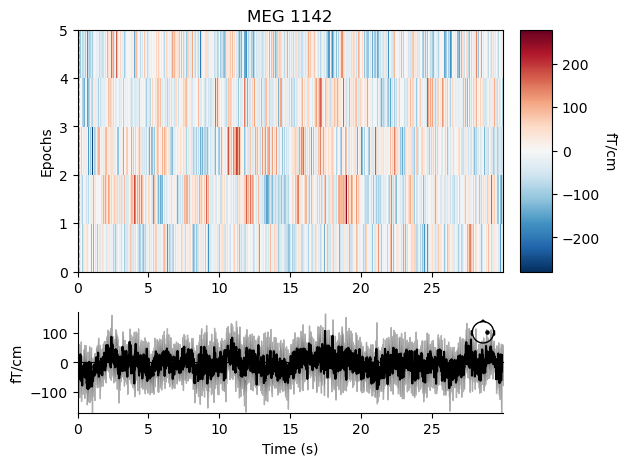

In [13]:
event_related_plot = epochs.plot_image(picks=['MEG 1142'])